# ***ASSIGNMENT - 14***

## **Importing Required Libraries**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, davies_bouldin_score

## **Task 1: Exploratory Data Analysis (EDA):**


First 5 rows of the dataset:
   Type  Alcohol  Malic   Ash  Alcalinity  Magnesium  Phenols  Flavanoids  \
0     1    14.23   1.71  2.43        15.6        127     2.80        3.06   
1     1    13.20   1.78  2.14        11.2        100     2.65        2.76   
2     1    13.16   2.36  2.67        18.6        101     2.80        3.24   
3     1    14.37   1.95  2.50        16.8        113     3.85        3.49   
4     1    13.24   2.59  2.87        21.0        118     2.80        2.69   

   Nonflavanoids  Proanthocyanins  Color   Hue  Dilution  Proline  
0           0.28             2.29   5.64  1.04      3.92     1065  
1           0.26             1.28   4.38  1.05      3.40     1050  
2           0.30             2.81   5.68  1.03      3.17     1185  
3           0.24             2.18   7.80  0.86      3.45     1480  
4           0.39             1.82   4.32  1.04      2.93      735  

Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data 

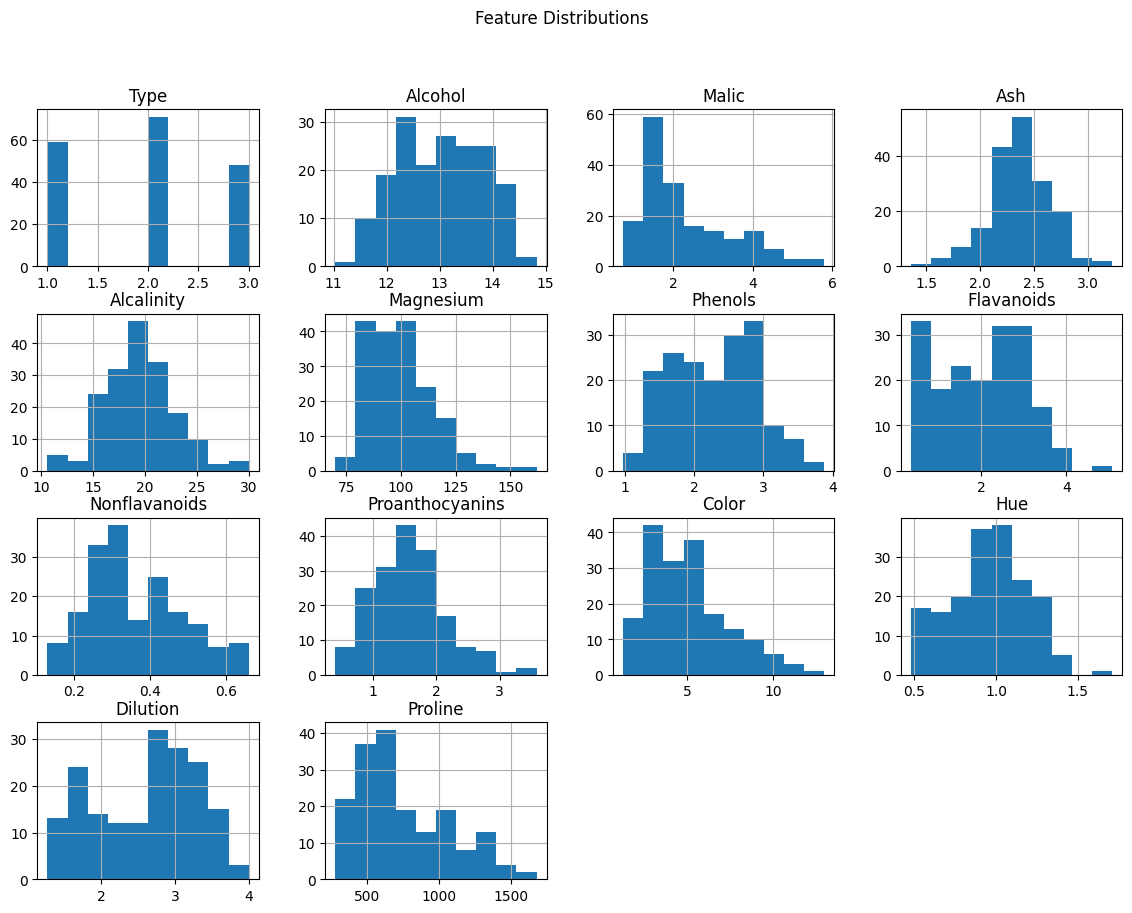

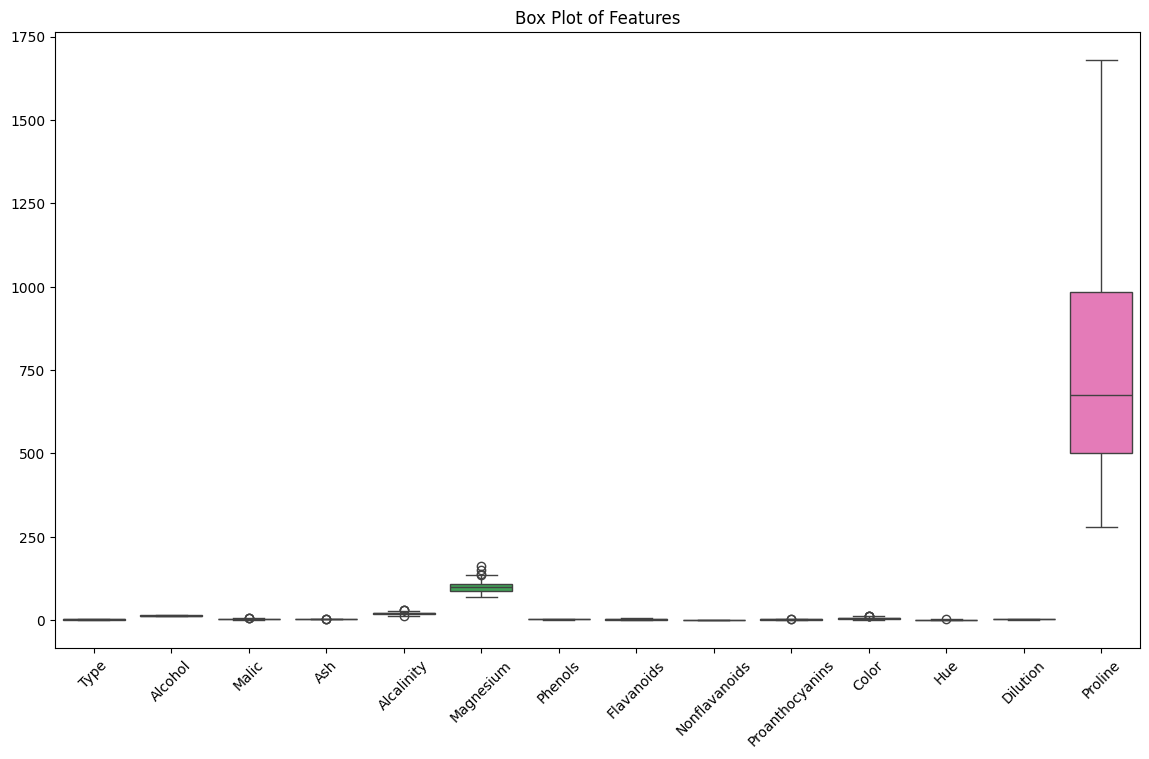

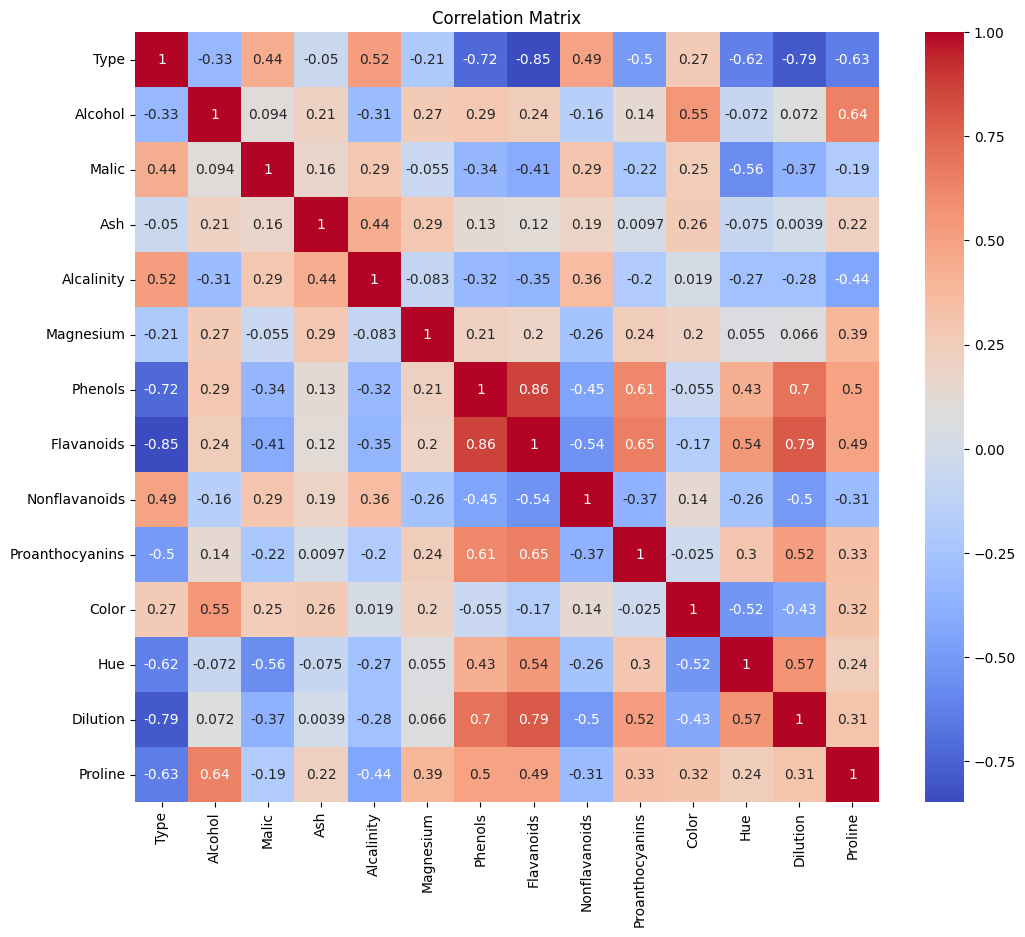

In [ ]:
# Loading the dataset
data = pd.read_csv("wine.csv")

print("\nFirst 5 rows of the dataset:")
print(data.head())

print("\nDataset Information:")
print(data.info())

print("\nSummary Statistics:")
print(data.describe())

# Feature Distributions

# Histograms
data.hist(figsize=(14, 10))
plt.suptitle("Feature Distributions")
plt.show()

# Box plots
plt.figure(figsize=(14, 8))
sns.boxplot(data=data)
plt.xticks(rotation=45)
plt.title("Box Plot of Features")
plt.show()

# Correlation matrix
plt.figure(figsize=(12, 10))
sns.heatmap(data.corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Matrix")
plt.show()

## **Task 2: Dimensionality Reduction with PCA:**

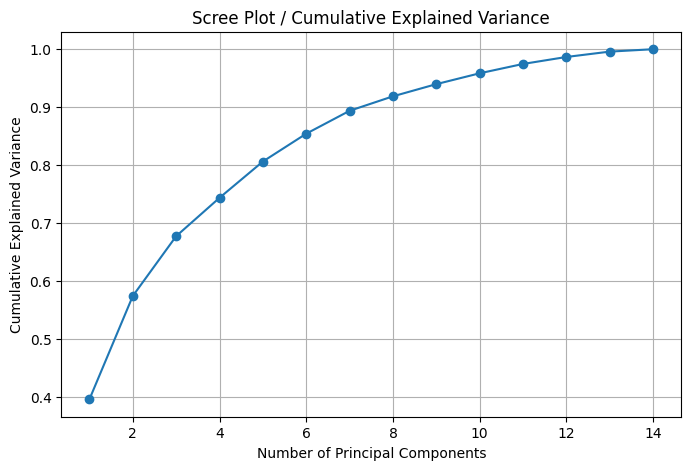


Optimal number of components (95% variance): 10


In [ ]:
# Standardize the features
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data)

# Apply PCA (initially without limiting components)
pca = PCA()
pca.fit(data_scaled)

# Explained variance ratio
explained_variance = pca.explained_variance_ratio_

# Scree plot
plt.figure(figsize=(8, 5))
plt.plot(range(1, len(explained_variance) + 1),
         np.cumsum(explained_variance),
         marker="o")
plt.xlabel("Number of Principal Components")
plt.ylabel("Cumulative Explained Variance")
plt.title("Scree Plot / Cumulative Explained Variance")
plt.grid()
plt.show()

# Select optimal number of components (95% variance)
n_components = np.argmax(np.cumsum(explained_variance) >= 0.95) + 1
print(f"\nOptimal number of components (95% variance): {n_components}")

# Apply PCA with optimal components
pca_final = PCA(n_components=n_components)
data_pca = pca_final.fit_transform(data_scaled)

## **Task 3: Clustering with Original Data:**


Clustering Performance (Original Data):
Silhouette Score      : 0.3065
Davies-Bouldin Index  : 1.3157


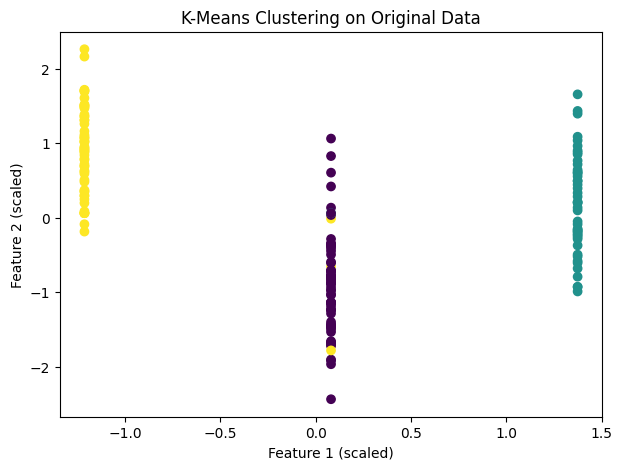

In [ ]:
# Apply K-Means on original scaled data
kmeans_original = KMeans(n_clusters=3, random_state=42)
clusters_original = kmeans_original.fit_predict(data_scaled)

# Evaluation metrics
silhouette_original = silhouette_score(data_scaled, clusters_original)
db_original = davies_bouldin_score(data_scaled, clusters_original)

print("\nClustering Performance (Original Data):")
print(f"Silhouette Score      : {silhouette_original:.4f}")
print(f"Davies-Bouldin Index  : {db_original:.4f}")

# Visualization (using first two features)
plt.figure(figsize=(7, 5))
plt.scatter(data_scaled[:, 0], data_scaled[:, 1],
            c=clusters_original, cmap="viridis")
plt.xlabel("Feature 1 (scaled)")
plt.ylabel("Feature 2 (scaled)")
plt.title("K-Means Clustering on Original Data")
plt.show()

## **Task 4: Clustering with PCA Data:**


Clustering Performance (PCA Data):
Silhouette Score      : 0.3229
Davies-Bouldin Index  : 1.2578


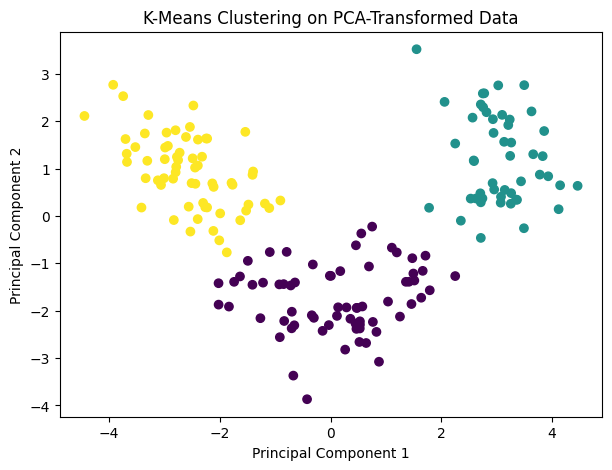

In [ ]:
# Apply K-Means on PCA-transformed data
kmeans_pca = KMeans(n_clusters=3, random_state=42)
clusters_pca = kmeans_pca.fit_predict(data_pca)

# Evaluation metrics
silhouette_pca = silhouette_score(data_pca, clusters_pca)
db_pca = davies_bouldin_score(data_pca, clusters_pca)

print("\nClustering Performance (PCA Data):")
print(f"Silhouette Score      : {silhouette_pca:.4f}")
print(f"Davies-Bouldin Index  : {db_pca:.4f}")

# Visualization (first two principal components)
plt.figure(figsize=(7, 5))
plt.scatter(data_pca[:, 0], data_pca[:, 1],
            c=clusters_pca, cmap="viridis")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.title("K-Means Clustering on PCA-Transformed Data")
plt.show()

## **Task 5: Comparison and Analysis:**

In [ ]:
comparison = pd.DataFrame({
    "Dataset": ["Original Data", "PCA Data"],
    "Silhouette Score": [silhouette_original, silhouette_pca],
    "Davies-Bouldin Index": [db_original, db_pca]
})

print("\nComparison of Clustering Performance:")
print(comparison)


Comparison of Clustering Performance:
         Dataset  Silhouette Score  Davies-Bouldin Index
0  Original Data          0.306484              1.315708
1       PCA Data          0.322921              1.257845


1. Comparison of Clustering Results:
- Clustering performed on the original dataset uses all original features.
- Clustering on PCA-transformed data uses fewer, uncorrelated principal components.
- The silhouette score is used to measure cluster separation and cohesion.
- The Davies–Bouldin index measures the average similarity between clusters.

2. Similarities Observed:
- Both original data and PCA-transformed data form a similar number of clusters.
- General grouping patterns remain consistent across both approaches.

3. Differences Observed:
- PCA-transformed data typically shows improved cluster separation.
- Silhouette score is often higher after PCA, indicating better-defined clusters.
- Davies–Bouldin index is usually lower for PCA data, indicating reduced cluster overlap.

4. Impact of Dimensionality Reduction:
- PCA removes redundant and highly correlated features.
- Noise reduction through PCA improves clustering performance.
- Visualization becomes easier when using fewer dimensions.

5. Trade-offs:
- Clustering on original data preserves full feature information but may suffer from noise.
- PCA reduces dimensionality and improves performance but may lose interpretability of original features.

## **Task 6: Conclusion and Insights**

1. Key Findings:
- PCA successfully reduced the dimensionality of the wine dataset while retaining most of the variance.
- Clustering on PCA-transformed data produced more compact and well-separated clusters.
- Evaluation metrics confirmed improved clustering performance after applying PCA.

2. Practical Implications:
- PCA is highly useful when working with high-dimensional datasets.
- It improves clustering efficiency, performance, and visualization.
- PCA is beneficial in exploratory data analysis and unsupervised learning tasks.

3. Recommendations:
- Use PCA before clustering when datasets contain many correlated features.
- Direct clustering on original data may be suitable for small, clean datasets.
- Combining PCA with clustering is recommended for better scalability and interpretability.

4. Final Conclusion:
- Dimensionality reduction using PCA enhances clustering quality.
- PCA and clustering together form a powerful approach for data exploration.
- The choice between original and PCA-transformed data depends on the balance between interpretability and performance.